In [1]:
import numpy as np
import matplotlib.pyplot as plt
from util.bandit import Bandit
from util.learner import Learner

In [42]:
x = np.random.normal(scale=1.5, size=(1, 10))
means = x[0].tolist()
y = []
for val in x[0]:
    y.append(np.random.normal(loc=val, size=(1, 1000))[0])


In [43]:
a_bandit = Bandit(y.copy(), means.copy())
learner = Learner(bandit=a_bandit, epsilon=0.1)
learner.learn_model()

[(np.float64(0.8712448049863079), 94),
 (np.float64(-0.04938071773997809), 94),
 (np.float64(-2.9667391993545276), 84),
 (np.float64(2.2916822986995498), 8754),
 (np.float64(-2.7963674334671653), 98),
 (np.float64(-1.9121689256422982), 94),
 (np.float64(1.7580688293966105), 482),
 (np.float64(0.721175803588125), 101),
 (np.float64(0.3314412560430096), 97),
 (np.float64(1.2766573290085548), 102)]

In [44]:
learner.get_avg_rewards()


[0.0,
 np.float64(-4.511831999606126),
 np.float64(-0.9107090896108154),
 np.float64(0.5735052727620333),
 np.float64(0.8600976279786076),
 np.float64(1.0211934207663778),
 np.float64(0.9961475829419135),
 np.float64(1.1612280590725284),
 np.float64(0.9998854793507638),
 np.float64(1.2722546700213269),
 np.float64(1.3339174419813697),
 np.float64(1.3123972346865795),
 np.float64(1.4397296574750722),
 np.float64(1.5248151528793654),
 np.float64(1.580119283720651),
 np.float64(1.5725132202357162),
 np.float64(1.7175303703106848),
 np.float64(1.6624377561916914),
 np.float64(1.6367630077539577),
 np.float64(1.623626391335529),
 np.float64(1.6130418302653926),
 np.float64(1.6612896840254634),
 np.float64(1.7114440568939437),
 np.float64(1.7548240956356203),
 np.float64(1.7729454220654537),
 np.float64(1.7213044847976013),
 np.float64(1.7157025995278066),
 np.float64(1.7077233024308203),
 np.float64(1.6599422030732103),
 np.float64(1.6180082619260718),
 np.float64(1.6264280462726812),
 np.f

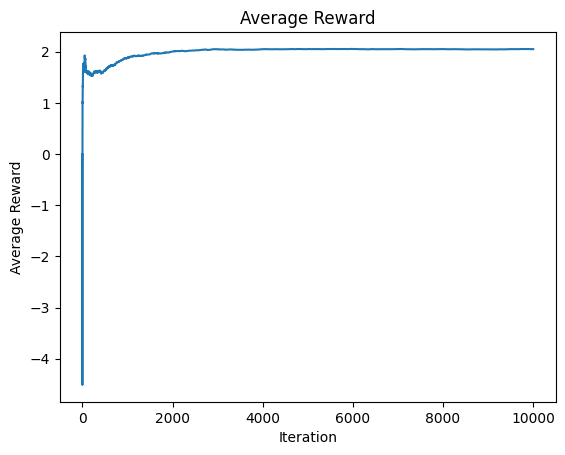

In [46]:
fig, ax = plt.subplots()
ax.plot(learner.get_avg_rewards())
ax.set_title("Average Reward")
ax.set_xlabel("Iteration")
ax.set_ylabel("Average Reward")
plt.show()

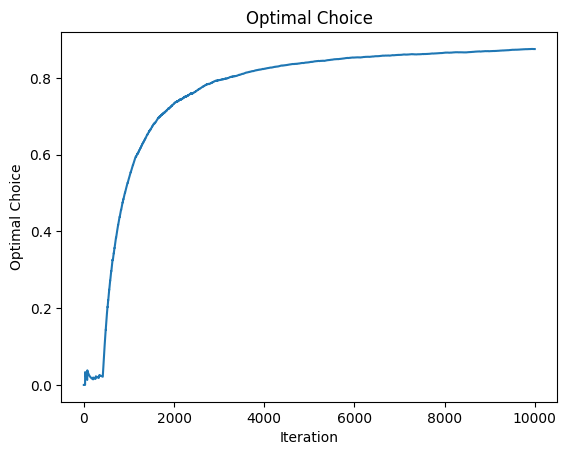

In [47]:
fig, ax = plt.subplots()
ax.plot(learner.get_optimal_choice())
ax.set_title("Optimal Choice")
ax.set_xlabel("Iteration")
ax.set_ylabel("Optimal Choice")
plt.show()

In [48]:
a_bandit.reset()
learner2 = Learner(bandit=a_bandit, epsilon=0.01)
learner2.learn_model()
learner2.get_model()
a_bandit.get_optimal_percentages()

[0.0,
 0.0,
 0.0,
 0.25,
 0.2,
 0.16666666666666666,
 0.14285714285714285,
 0.125,
 0.1111111111111111,
 0.1,
 0.18181818181818182,
 0.16666666666666666,
 0.15384615384615385,
 0.14285714285714285,
 0.13333333333333333,
 0.125,
 0.11764705882352941,
 0.1111111111111111,
 0.10526315789473684,
 0.1,
 0.09523809523809523,
 0.09090909090909091,
 0.08695652173913043,
 0.08333333333333333,
 0.08,
 0.07692307692307693,
 0.07407407407407407,
 0.07142857142857142,
 0.06896551724137931,
 0.06666666666666667,
 0.06451612903225806,
 0.0625,
 0.06060606060606061,
 0.058823529411764705,
 0.05714285714285714,
 0.05555555555555555,
 0.05405405405405406,
 0.05263157894736842,
 0.05128205128205128,
 0.05,
 0.04878048780487805,
 0.047619047619047616,
 0.046511627906976744,
 0.045454545454545456,
 0.044444444444444446,
 0.043478260869565216,
 0.0425531914893617,
 0.041666666666666664,
 0.04081632653061224,
 0.04,
 0.0392156862745098,
 0.038461538461538464,
 0.03773584905660377,
 0.037037037037037035,
 0.0

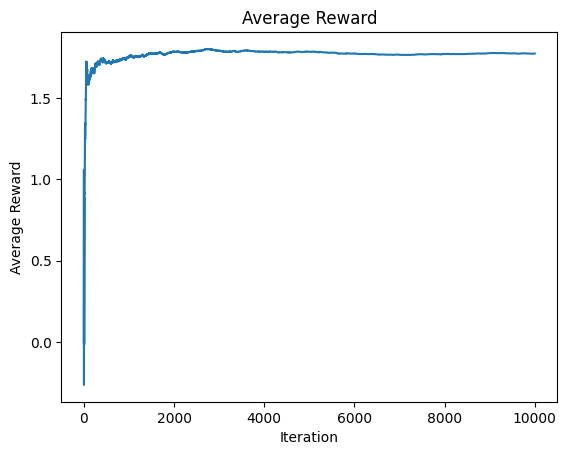

In [50]:
fig, ax = plt.subplots()
ax.plot(learner2.get_avg_rewards())
ax.set_title("Average Reward")
ax.set_xlabel("Iteration")
ax.set_ylabel("Average Reward")
plt.show()

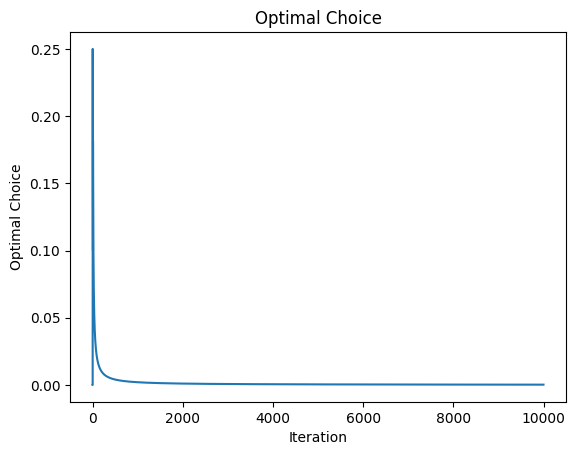

In [51]:
plt.show()
fig, ax = plt.subplots()
ax.plot(learner2.get_optimal_choice())
ax.set_title("Optimal Choice")
ax.set_xlabel("Iteration")
ax.set_ylabel("Optimal Choice")
plt.show()

In [7]:
running_optimal_choice_percentage = [0] * 1000
running_avg_reward = [0] * 1000
running_avg_reward_01_epsilon = [0] * 1000
running_optimal_choice_percentage_01_epsilon = [0] * 1000
running_avg_reward_0_epsilon = [0] * 1000
running_optimal_choice_percentage_0_epsilon = [0] * 1000
running_avg_reward_optimistic = [0] * 1000
running_optimal_choice_percentage_optimistic = [0] * 1000

for i in range(1000):
    x = np.random.normal(scale=1.5, size=(1, 10))
    means = x[0].tolist()
    y = []
    for val in x[0]:
        y.append(np.random.normal(loc=val, size=(1, 1000))[0])
    a_bandit = Bandit(y.copy(), means.copy())
    learner = Learner(bandit=a_bandit, epsilon=0.1)
    learner.learn_model()
    running_avg_reward = [x + (1 / (i + 1)) * (y - x) for x, y in zip(running_avg_reward, learner.get_avg_rewards())]
    running_optimal_choice_percentage = [x + (1 / (i + 1)) * (y - x) for x, y in
                                         zip(running_optimal_choice_percentage, learner.get_optimal_choice())]
    
    a_bandit.reset()
    learner2 = Learner(bandit=a_bandit, epsilon=0.01)
    learner2.learn_model()
    running_avg_reward_01_epsilon = [x + (1 / (i + 1)) * (y - x) for x, y in
                                     zip(running_avg_reward_01_epsilon, learner2.get_avg_rewards())]
    running_optimal_choice_percentage_01_epsilon = [x + (1 / (i + 1)) * (y - x) for x, y in
                                                    zip(running_optimal_choice_percentage_01_epsilon,
                                                        learner2.get_optimal_choice())]
    
    a_bandit.reset()
    learner3 = Learner(bandit=a_bandit, epsilon=0)
    learner3.learn_model()
    running_avg_reward_0_epsilon = [x + (1 / (i + 1)) * (y - x) for x, y in
                                    zip(running_avg_reward_0_epsilon, learner3.get_avg_rewards())]
    running_optimal_choice_percentage_0_epsilon = [x + (1 / (i + 1)) * (y - x) for x, y in
                                                   zip(running_optimal_choice_percentage_0_epsilon,
                                                       learner3.get_optimal_choice())]
    
    a_bandit.reset()
    learner4 = Learner(bandit=a_bandit, epsilon=0.1, initial_value=5)
    learner4.learn_model()
    running_avg_reward_optimistic = [x + (1 / (i + 1)) * (y - x) for x, y in
                                     zip(running_avg_reward_optimistic, learner4.get_avg_rewards())]
    running_optimal_choice_percentage_optimistic = [x + (1 / (i + 1)) * (y - x) for x, y in
                                                    zip(running_optimal_choice_percentage_optimistic,
                                                        learner4.get_optimal_choice())]

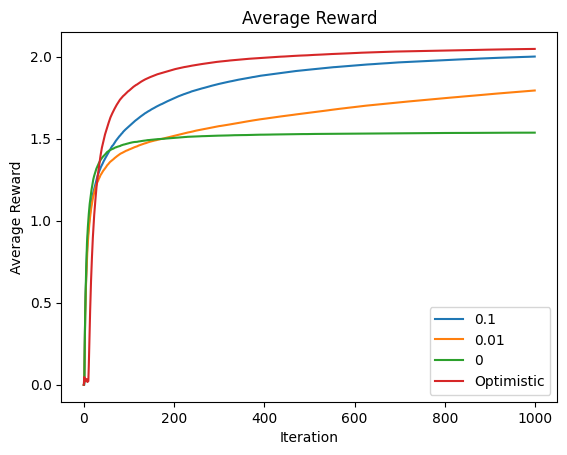

In [8]:

fig, ax = plt.subplots()
ax.plot(running_avg_reward)
ax.plot(running_avg_reward_01_epsilon)
ax.plot(running_avg_reward_0_epsilon)
ax.plot(running_avg_reward_optimistic)
ax.set_title("Average Reward")
ax.set_xlabel("Iteration")
ax.set_ylabel("Average Reward")
ax.legend(["0.1", "0.01", "0", "Optimistic"])
plt.show()

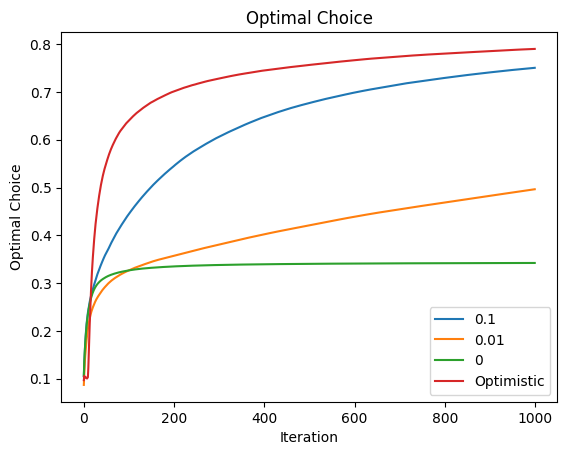

In [9]:
fig, ax = plt.subplots()
ax.plot(running_optimal_choice_percentage)
ax.plot(running_optimal_choice_percentage_01_epsilon)
ax.plot(running_optimal_choice_percentage_0_epsilon)
ax.plot(running_optimal_choice_percentage_optimistic)
ax.set_title("Optimal Choice")
ax.set_xlabel("Iteration")
ax.set_ylabel("Optimal Choice")
ax.legend(["0.1", "0.01", "0", "Optimistic"])
plt.show()